<a href="https://colab.research.google.com/github/DarShabi/OCR-Company-Project/blob/main/Week%232/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82808 sha256=1b457355ebb7506e6896723368e7e81bc2b22e9a8ea79d77bd350659562de55f
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55617 sha256=786dd72700d61348664b3fc1da4963f249c2b90c404c96946e51c6d12a67368e
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.cluster import KMeans
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from sklearn.manifold import TSNE
import seaborn as sns
import umap
from sklearn.manifold import Isomap

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/OCR_Project/data.csv'

df = pd.read_csv(data_path)

display(df)

,file_path,text
0,/content/drive/MyDrive/Data/Data_samples/forum...,Aloha\nW LEREEE\n3imL.\nT19\nucket\nAIR CALIFO...
1,/content/drive/MyDrive/Data/Data_samples/forum...,TAM\nVAAIR sano oCTORS\n*****\nphotobuckeł\nSI...
2,/content/drive/MyDrive/Data/Data_samples/forum...,Pre-Production Photo\ns ON\n909\n909\n5265\nTh...
3,/content/drive/MyDrive/Data/Data_samples/forum...,AIRCANADA\n.......\n..................\nWings9...
4,/content/drive/MyDrive/Data/Data_samples/forum...,DRAGON\nE Asiana\nisiviu ini\n- Asiana Airline...
...,...,...
4863,/content/drive/MyDrive/Data/Data_samples/Data ...,hacked by Kro0oz\n
4864,/content/drive/MyDrive/Data/Data_samples/Data ...,HACKED BY KINGSAN PAKISTAN ZINDABAD KASHMIR ZI...
4865,/content/drive/MyDrive/Data/Data_samples/Data ...,Hacked By KingSkrupellos CyBe RIZM\nTechnologi...
4866,/content/drive/MyDrive/Data/Data_samples/Data ...,"Hacked By Mr.Kro0oz.305\nKrZSec\n""Everything's..."


In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)

Training set shape: (3894, 2)
Testing set shape: (974, 2)


In [ ]:
# Choose a model (either ResNet50 or VGG16)
## model = ResNet50(weights='imagenet', include_top=False, pooling='avg') # for ResNet
# model = VGG16(weights='imagenet', include_top=False, pooling='avg') # for VGG16
## preprocess_input = resnet_preprocess # for ResNet
# preprocess_input = vgg_preprocess # for VGG16

# Extract features from images
## features = []
## counter = 1
## for image_path in train_df['file_path']:
    ## image = load_img(image_path, target_size=(224, 224))
    ## image = img_to_array(image)
    ## image = np.expand_dims(image, axis=0)
    ## image = preprocess_input(image)
    ## feature = model.predict(image)
    ## print(f"Image number : {counter}")
    ## features.append(feature.flatten())
    ## counter += 1

## features = np.array(features)

1/1 [==============================] - 1s 836ms/step
Image number : 1
1/1 [==============================] - 0s 130ms/step
Image number : 2
1/1 [==============================] - 0s 183ms/step
Image number : 3
1/1 [==============================] - 0s 134ms/step


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 131ms/step
Image number : 823
1/1 [==============================] - 0s 131ms/step
Image number : 824
1/1 [==============================] - 0s 134ms/step
Image number : 825
1/1 [==============================] - 0s 134ms/step
Image number : 826
1/1 [==============================] - 0s 128ms/step
Image number : 827
1/1 [==============================] - 0s 131ms/step
Image number : 828
1/1 [==============================] - 0s 140ms/step
Image number : 829
1/1 [==============================] - 0s 132ms/step
Image number : 830
1/1 [==============================] - 0s 130ms/step
Image number : 831
1/1 [==============================] - 0s 128ms/step
Image number : 832
1/1 [==============================] - 0s 133ms/step
Image number : 833
1/1 [==============================] - 0s 134ms/step
Image number : 834
1/1 [==============================] - 0s 136ms/step
Image number : 835
1/1 [========

In [ ]:
save_path = '/content/drive/MyDrive/OCR_Project/features.npy'
# np.save(save_path, features)

In [ ]:
features = np.load(save_path)

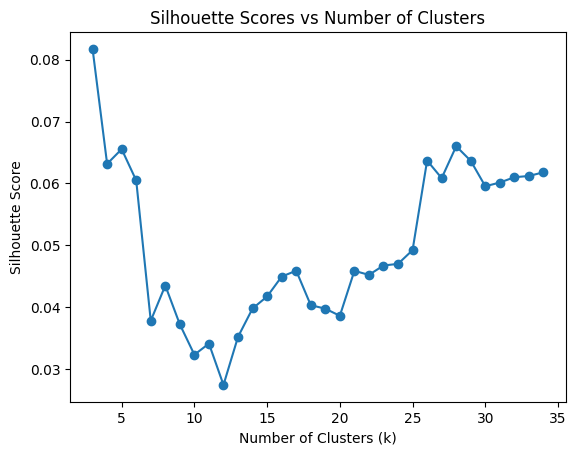

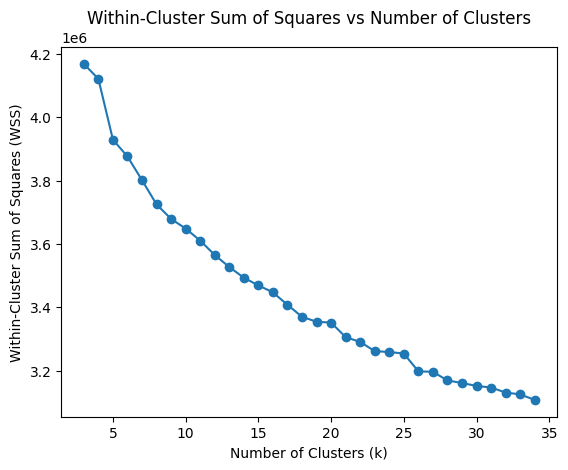

In [ ]:
silhouette_scores = []
wss = []

K_range = range(3, 35) # You can change this range as needed

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto', init='k-means++').fit(features)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(features, labels))
    wss.append(kmeans.inertia_) # Inertia is the sum of squared distances to the closest centroid

# Plot Silhouette Scores
plt.figure()
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Plot WSS
plt.figure()
plt.plot(K_range, wss, marker='o')
plt.title('Within-Cluster Sum of Squares vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.show()

In [ ]:
n_clusters = 25

In [ ]:
# Apply clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto', init='k-means++').fit(features)

In [ ]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

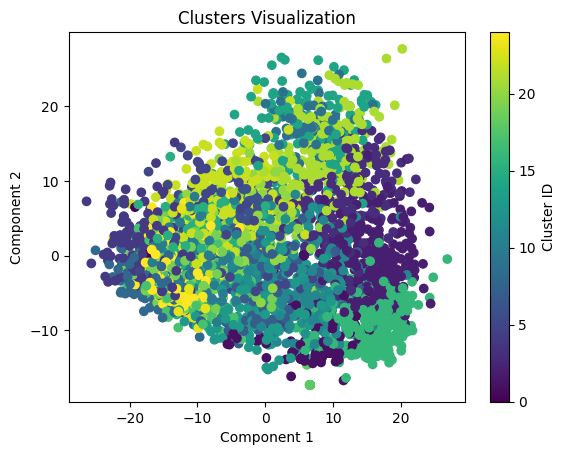

In [ ]:
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Clusters Visualization')
plt.colorbar(label='Cluster ID')
plt.show()


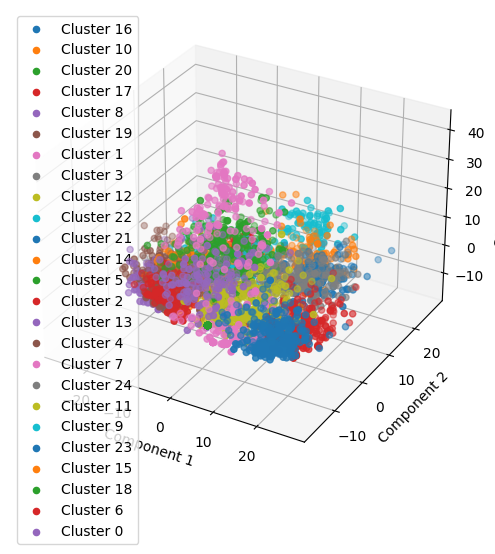

In [ ]:
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(features)

cluster_df = pd.DataFrame(reduced_features, columns=['Component 1', 'Component 2', 'Component 3'])
cluster_df['Cluster'] = kmeans.labels_

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for cluster in cluster_df['Cluster'].unique():
    subset = cluster_df[cluster_df['Cluster'] == cluster]
    ax.scatter(subset['Component 1'], subset['Component 2'], subset['Component 3'], label=f'Cluster {cluster}')

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.legend()
plt.show()

In [ ]:

# Create an interactive 3D scatter plot with Plotly
fig = px.scatter_3d(cluster_df, x='Component 1', y='Component 2', z='Component 3', color='Cluster')
fig.show()


In [ ]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features)

In [ ]:
tsne_df = pd.DataFrame(data = tsne_results, columns=['tsne-2d-one', 'tsne-2d-two'])
tsne_df['cluster'] = kmeans.labels_


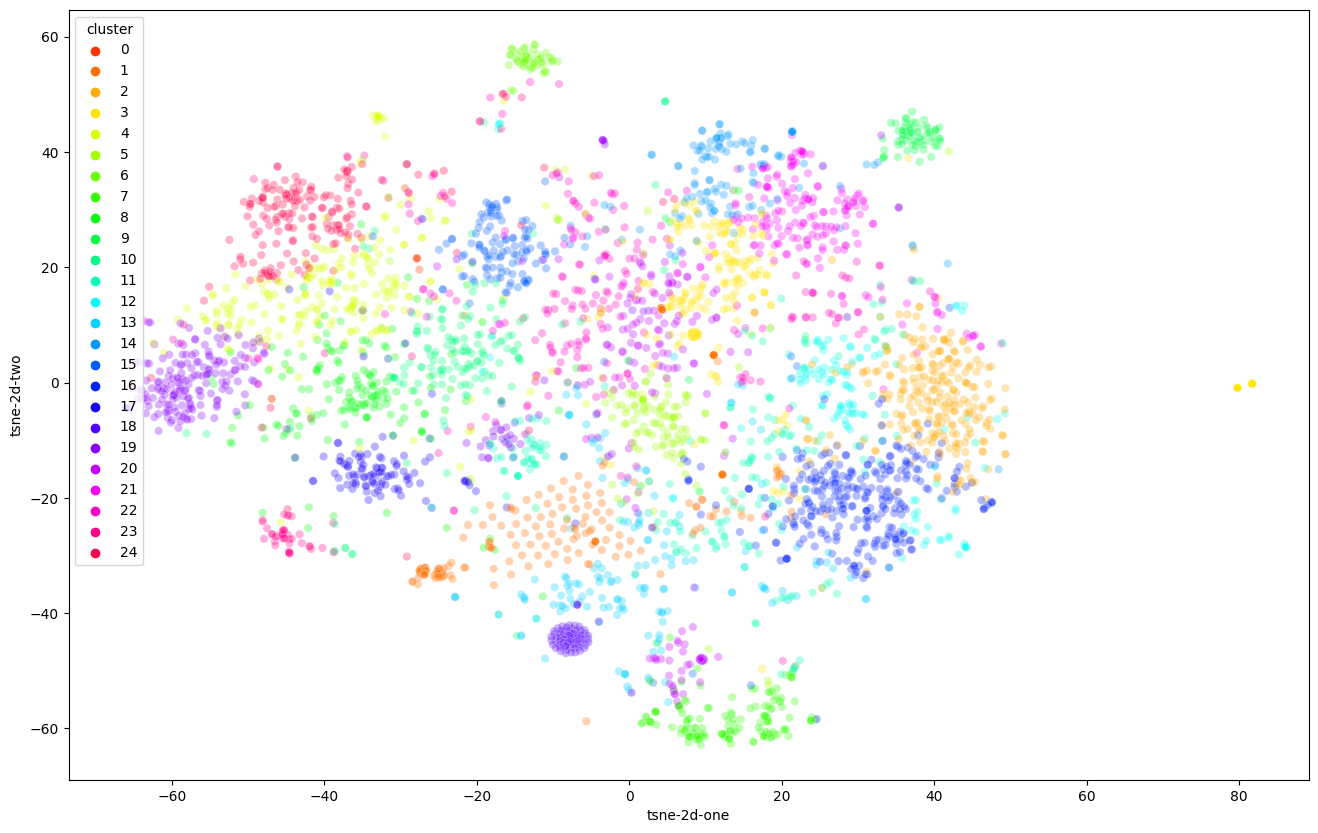

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="cluster",
    palette=sns.color_palette("hsv", n_clusters),
    data=tsne_df,
    legend="full",
    alpha=0.3
)
plt.show()


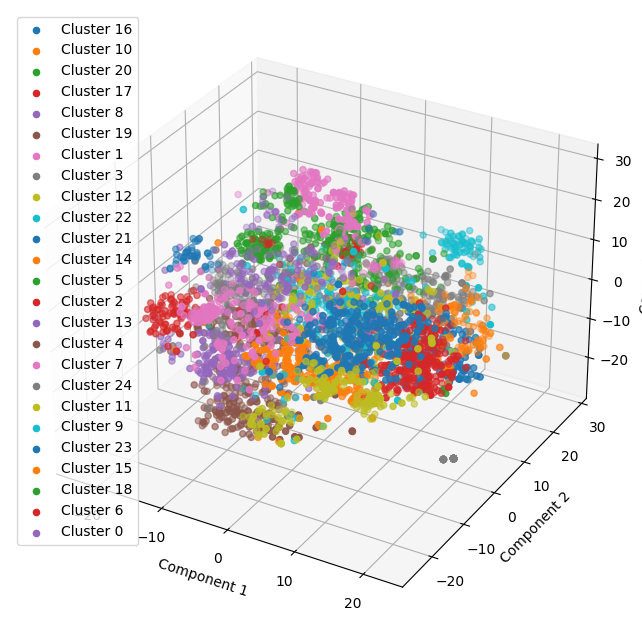

In [ ]:
# Apply t-SNE with 3 components
tsne = TSNE(n_components=3, random_state=42)
transformed = tsne.fit_transform(features)

# Create a new DataFrame to store the 3D t-SNE components
tsne_df = pd.DataFrame(transformed, columns=['Component 1', 'Component 2', 'Component 3'])
tsne_df['cluster'] = kmeans.labels_

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# You can loop through the clusters and plot each one with a different color
for cluster_num in tsne_df['cluster'].unique():
    cluster_data = tsne_df[tsne_df['cluster'] == cluster_num]
    ax.scatter(cluster_data['Component 1'], cluster_data['Component 2'], cluster_data['Component 3'], label=f'Cluster {cluster_num}')

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.legend()
plt.show()

In [ ]:
# Create the interactive 3D scatter plot
fig = px.scatter_3d(tsne_df, x='Component 1', y='Component 2', z='Component 3', color='cluster', title='t-SNE 3D Visualization', color_continuous_scale='Viridis')
fig.show()

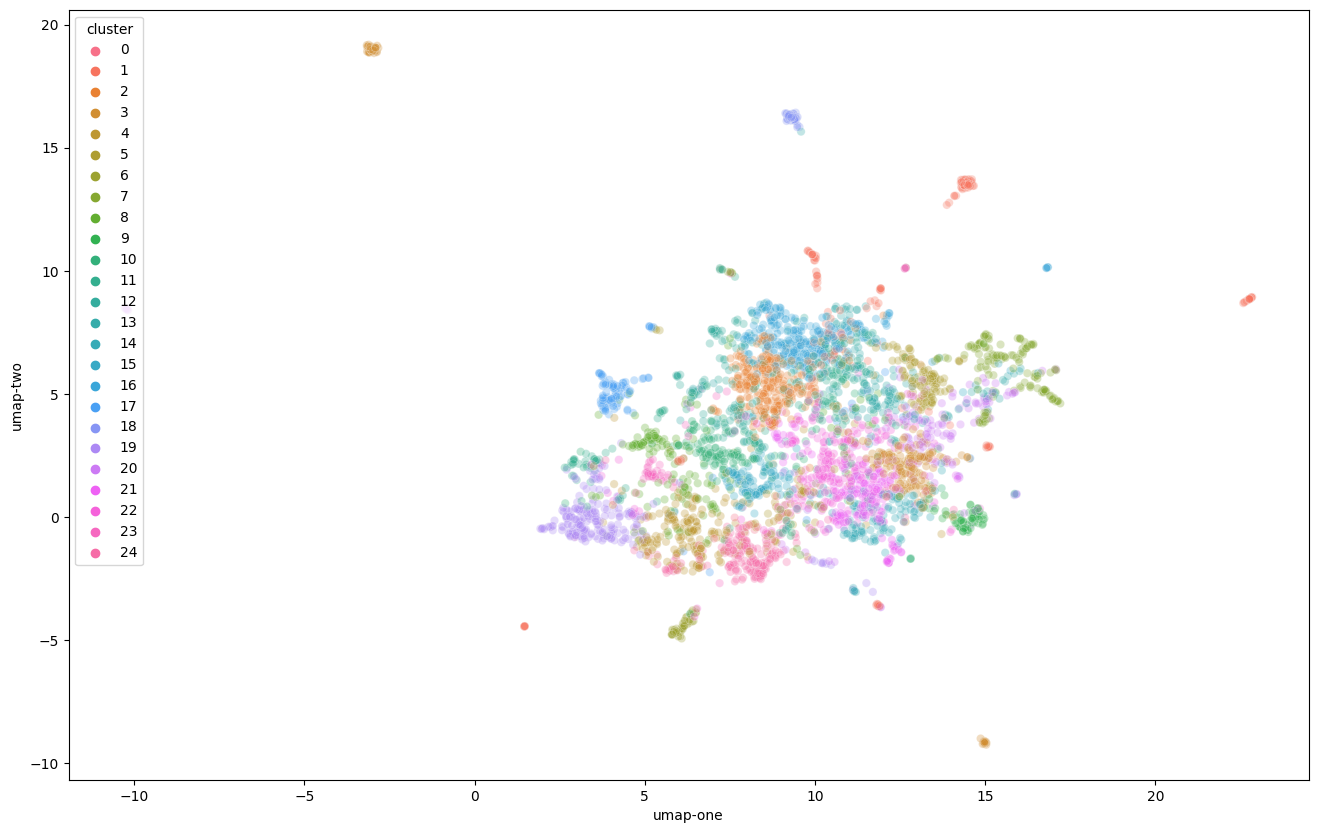

In [ ]:
umap_results = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='correlation').fit_transform(features)

umap_df = pd.DataFrame(data = umap_results, columns=['umap-one', 'umap-two'])
umap_df['cluster'] = kmeans.labels_

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="umap-one", y="umap-two",
    hue="cluster",
    palette=sns.color_palette("husl", 25),
    data=umap_df,
    legend="full",
    alpha=0.3
)
plt.show()
